# Note


* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List


In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

589

# Perform API Calls


* Perform a weather check on each city using a series of successive API calls.

* Include a print log of each city as it'sbeing processed (with the city number and city name).
 

In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Create query URL
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

In [4]:
city_list = []
temperature = []
lats = []
long = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
count = 1


for city in cities:
    
    response = requests.get(query_url + city).json()


    try:

        temperature.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_list.append(response['name'])

        print(f"Processing record {count} | {city}")
        count = count + 1
        
    except:
        print(f"{city} not found.")
        time.sleep(1)
        
              

Processing record 1 | tuktoyaktuk
Processing record 2 | pevek
Processing record 3 | sorong
Processing record 4 | khatanga
barentsburg not found.
Processing record 5 | hasaki
Processing record 6 | arraial do cabo
Processing record 7 | coihaique
Processing record 8 | mataura
Processing record 9 | hambantota
Processing record 10 | rio gallegos
Processing record 11 | port elizabeth
Processing record 12 | havoysund
Processing record 13 | brownfield
Processing record 14 | rikitea
Processing record 15 | mehamn
Processing record 16 | albany
Processing record 17 | sandwick
ningan not found.
Processing record 18 | upernavik
Processing record 19 | ushuaia
Processing record 20 | sioux lookout
Processing record 21 | carnarvon
Processing record 22 | te anau
Processing record 23 | bengkulu
Processing record 24 | vaini
Processing record 25 | birjand
Processing record 26 | tautira
belushya guba not found.
Processing record 27 | lavrentiya
Processing record 28 | avarua
Processing record 29 | muros
Proce

Processing record 236 | palu
Processing record 237 | nokaneng
Processing record 238 | geraldton
el faiyum not found.
Processing record 239 | goderich
Processing record 240 | padang
Processing record 241 | lata
toliary not found.
Processing record 242 | tual
Processing record 243 | mount isa
Processing record 244 | oktyabrskiy
mys shmidta not found.
Processing record 245 | miasskoye
Processing record 246 | himare
Processing record 247 | dalkola
labutta not found.
Processing record 248 | nioro
Processing record 249 | marion
Processing record 250 | kavaratti
tome-acu not found.
Processing record 251 | san cristobal
Processing record 252 | lompoc
Processing record 253 | camopi
Processing record 254 | kavieng
Processing record 255 | canaries
Processing record 256 | saint-augustin
galiwinku not found.
Processing record 257 | ardabil
Processing record 258 | dakoro
Processing record 259 | ballina
Processing record 260 | provideniya
Processing record 261 | aktau
Processing record 262 | yemtsa
P

Processing record 472 | amapa
Processing record 473 | esna
Processing record 474 | hohhot
Processing record 475 | portree
Processing record 476 | paso de carrasco
Processing record 477 | atambua
Processing record 478 | asfi
Processing record 479 | kaputa
Processing record 480 | polaniec
Processing record 481 | azare
Processing record 482 | lokosovo
Processing record 483 | nago
Processing record 484 | tarko-sale
Processing record 485 | cachoeira
Processing record 486 | berlevag
Processing record 487 | kargil
Processing record 488 | mufulira
Processing record 489 | saint-pierre
Processing record 490 | erzurum
Processing record 491 | vetapalem
Processing record 492 | nikel
Processing record 493 | znamenskoye
Processing record 494 | shahr-e babak
Processing record 495 | heyang
Processing record 496 | astoria
Processing record 497 | beisfjord
Processing record 498 | jackson
Processing record 499 | barberton
Processing record 500 | luganville
Processing record 501 | dumas
Processing record 5

# Convert Raw Data to DataFrame


* Export the city data into a .csv.

* Display the DataFrame


In [5]:
# create a data frame
weather_data = pd.DataFrame({
    "City": city_list,
    "Lat": lats,
    "Lng": long,
    "Max Temp": temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
})

weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.4541,-133.0374,51.80,100,100,5.75,CA,1660666765
1,Pevek,69.7008,170.3133,38.70,67,42,8.81,RU,1660666766
2,Sorong,-0.8833,131.2500,76.23,88,100,3.06,ID,1660666766
3,Khatanga,71.9667,102.5000,41.97,87,1,10.02,RU,1660666766
4,Hasaki,35.7333,140.8333,82.80,80,100,13.27,JP,1660666768


In [6]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,5.380000e+02
mean,20.477061,15.101341,71.273123,68.027881,54.382900,8.578699,1.660667e+09
std,32.538089,91.478385,14.646022,22.656391,39.523114,5.545087,1.007621e+02
min,-54.800000,-175.200000,29.880000,6.000000,0.000000,0.000000,1.660666e+09
25%,-6.134500,-66.744575,60.895000,57.000000,12.000000,4.567500,1.660667e+09
50%,26.112900,22.025000,74.715000,72.000000,62.000000,7.325000,1.660667e+09
75%,45.779150,90.046875,81.020000,86.750000,99.000000,11.500000,1.660667e+09
max,78.218600,179.316700,111.130000,100.000000,100.000000,31.050000,1.660667e+09


In [7]:
# export DataFrame to CSV file
weather_data.to_csv("output_data/cities.csv", index=False, header=True)

# Inspect the data and remove the cities where the humidity > 100%.


* Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
high_humidity = weather_data.loc[weather_data["Humidity"] > 100]
high_humidity.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


# Plotting the Data


* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.

* Save the plotted figures as .pngs.


# Latitude vs. Temperature Plot


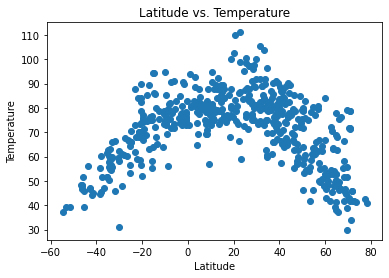

In [11]:
plt.scatter(weather_data['Lat'], weather_data['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude vs. Temperature')

plt.savefig('output_data/Latitude-vs-Temperature.png')

plt.show()


This plot analyzes the relationship between temperature and latitude. It shows that higher temperature occurs between -20 to 40 degrees latitude.

# Latitude vs. Humidity Plot


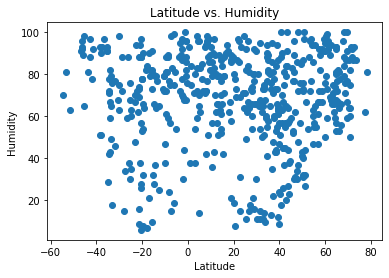

In [12]:
plt.scatter(weather_data['Lat'], weather_data['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')

plt.savefig('output_data/Latitude-vs-Humidity.png')

plt.show()

This plot analyzes the relationship between humidity and latitude. Based on what we see, we can say that there is no dependency between latitude and humidity.

# Latitude vs. Cloudiness Plot


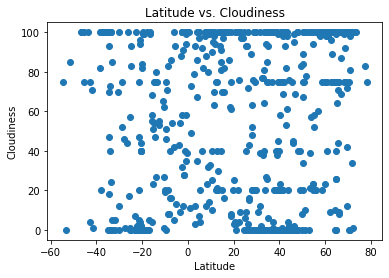

In [14]:
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')

plt.savefig('output_data/Latitude-vs-Cloudiness.png')

plt.show()

This plot analyzes the relationship between cloudiness and latitude. Based on what we see, we can say that there is no dependency between latitude and cloudiness.

# Latitude vs. Wind Speed Plot


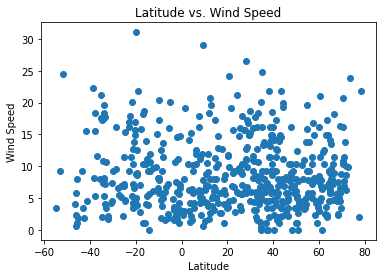

In [15]:
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')

plt.savefig('output_data/Latitude-vs-Wind_Speed.png')

plt.show()

This plot analyzes the relationship between wind speed and latitude. Based on what we see, we can say that there is no dependency between latitude and wind speed.

# Linear Regression


In [16]:
# creating the dataframes for the northern and southern hemisphere 
northern_hemisphere = weather_data.loc[weather_data["Lat"]>=0]

southern_hemisphere = weather_data.loc[weather_data["Lat"]<0]

# Northern Hemisphere - Max Temp vs. Latitude Linear Regression


The rsquare-value is: 0.4356943418643365


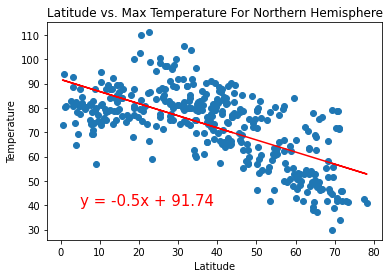

In [42]:
#Linear Regression
slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemisphere['Lat'], northern_hemisphere['Max Temp'])

line_equ = f"y = {round(slope,2)}x + {round(intercept,2)}"

regress_value = slope*northern_hemisphere['Lat'] + intercept

plt.scatter(northern_hemisphere['Lat'], northern_hemisphere['Max Temp'])
plt.annotate(line_equ, (5,40), fontsize=15, color='r')
plt.plot(northern_hemisphere['Lat'], regress_value, c='r')
plt.title(f"Latitude vs. Max Temperature For Northern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Temperature')

print(f"The rsquare-value is: {rvalue**2}")

plt.show()

# Southern Hemisphere - Max Temp vs. Latitude Linear Regression


The rsquare-value is: 0.626252790636361


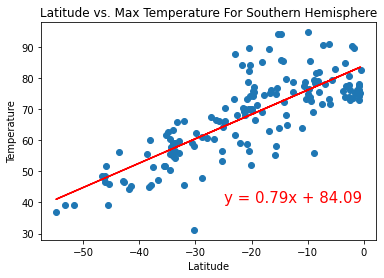

In [43]:
#Linear Regression
slope, intercept, rvalue, pvalue, stderr = linregress(southern_hemisphere['Lat'], southern_hemisphere['Max Temp'])

line_equ = f"y = {round(slope,2)}x + {round(intercept,2)}"

regress_value = slope*southern_hemisphere['Lat'] + intercept

plt.scatter(southern_hemisphere['Lat'], southern_hemisphere['Max Temp'])
plt.annotate(line_equ, (-25,40), fontsize=15, color='r')
plt.plot(southern_hemisphere['Lat'], regress_value, c='r')
plt.title(f"Latitude vs. Max Temperature For Southern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Temperature')

print(f"The rsquare-value is: {rvalue**2}")

plt.show()

The linear regressions are modeling the dependence of temperature on latitude for both the Northern and Southern Hemisphere. 
We can see that in the North Hemisphere, when the latitude increases the temperature decreases. 
In the Southern Hemisphere, when the as latitude increases the temperature increases as well.

# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression


The rsquare-value is: 0.0025198318256095527


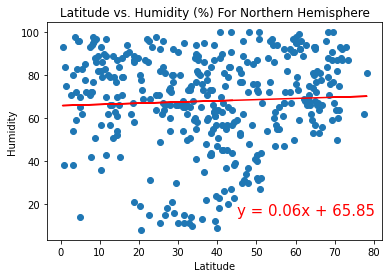

In [41]:
#Linear Regression
slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemisphere['Lat'], northern_hemisphere['Humidity'])

line_equ = f"y = {round(slope,2)}x + {round(intercept,2)}"

regress_value = slope*northern_hemisphere['Lat'] + intercept

plt.scatter(northern_hemisphere['Lat'], northern_hemisphere['Humidity'])
plt.annotate(line_equ, (45,15), fontsize=15, color='r')
plt.plot(northern_hemisphere['Lat'], regress_value, c='r')
plt.title(f"Latitude vs. Humidity (%) For Northern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The rsquare-value is: {rvalue**2}")

plt.show()

# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression


The rsquare-value is: 0.002320044151478926


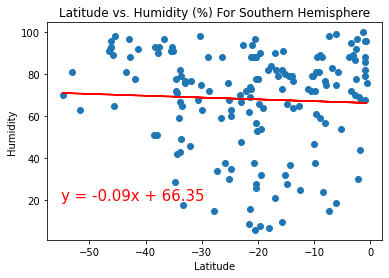

In [40]:
#Linear Regression
slope, intercept, rvalue, pvalue, stderr = linregress(southern_hemisphere['Lat'], southern_hemisphere['Humidity'])

line_equ = f"y = {round(slope,2)}x + {round(intercept,2)}"

regress_value = slope*southern_hemisphere['Lat'] + intercept

plt.scatter(southern_hemisphere['Lat'], southern_hemisphere['Humidity'])
plt.annotate(line_equ, (-55,20), fontsize=15, color='r')
plt.plot(southern_hemisphere['Lat'], regress_value, c='r')
plt.title(f"Latitude vs. Humidity (%) For Southern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The rsquare-value is: {rvalue**2}")

plt.show()

# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression


The rsquare-value is: 0.0029601785889741463


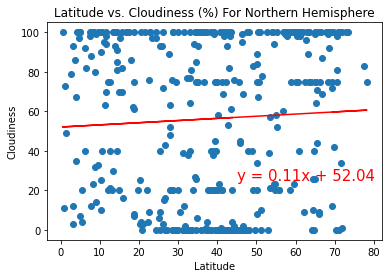

In [39]:
#Linear Regression
slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemisphere['Lat'], northern_hemisphere['Cloudiness'])

line_equ = f"y = {round(slope,2)}x + {round(intercept,2)}"

regress_value = slope*northern_hemisphere['Lat'] + intercept

plt.scatter(northern_hemisphere['Lat'], northern_hemisphere['Cloudiness'])
plt.annotate(line_equ, (45,25), fontsize=15, color='r')
plt.plot(northern_hemisphere['Lat'], regress_value, c='r')
plt.title(f"Latitude vs. Cloudiness (%) For Northern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The rsquare-value is: {rvalue**2}")

plt.show()

# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression


The rsquare-value is: 0.01275514569565796


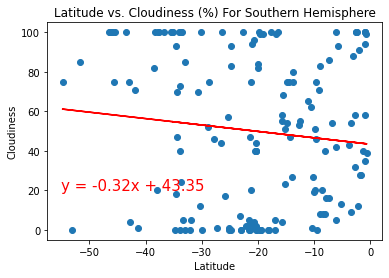

In [38]:
#Linear Regression
slope, intercept, rvalue, pvalue, stderr = linregress(southern_hemisphere['Lat'], southern_hemisphere['Cloudiness'])

line_equ = f"y = {round(slope,2)}x + {round(intercept,2)}"

regress_value = slope*southern_hemisphere['Lat'] + intercept

plt.scatter(southern_hemisphere['Lat'], southern_hemisphere['Cloudiness'])
plt.annotate(line_equ, (-55,20), fontsize=15, color='r')
plt.plot(southern_hemisphere['Lat'], regress_value, c='r')
plt.title(f"Latitude vs. Cloudiness (%) For Southern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The rsquare-value is: {rvalue**2}")

plt.show()

# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression


The rsquare-value is: 3.52200330322209e-05


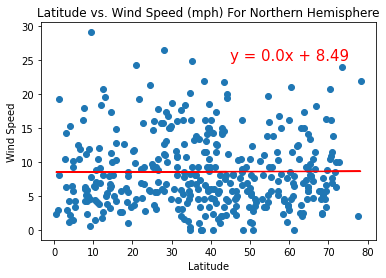

In [37]:
#Linear Regression
slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemisphere['Lat'], northern_hemisphere['Wind Speed'])

line_equ = f"y = {round(slope,2)}x + {round(intercept,2)}"

regress_value = slope*northern_hemisphere['Lat'] + intercept

plt.scatter(northern_hemisphere['Lat'], northern_hemisphere['Wind Speed'])
plt.annotate(line_equ, (45,25), fontsize=15, color='r')
plt.plot(northern_hemisphere['Lat'], regress_value, c='r')
plt.title(f"Latitude vs. Wind Speed (mph) For Northern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"The rsquare-value is: {rvalue**2}")

plt.show()

# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression


The rsquare-value is: 0.011505113798741336


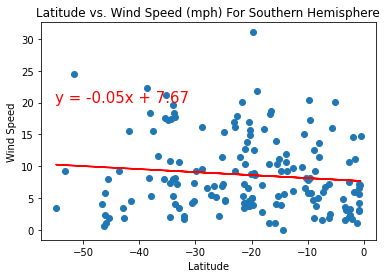

In [36]:
#Linear Regression
slope, intercept, rvalue, pvalue, stderr = linregress(southern_hemisphere['Lat'], southern_hemisphere['Wind Speed'])

line_equ = f"y = {round(slope,2)}x + {round(intercept,2)}"

regress_value = slope*southern_hemisphere['Lat'] + intercept

plt.scatter(southern_hemisphere['Lat'], southern_hemisphere['Wind Speed'])
plt.annotate(line_equ, (-55,20), fontsize=15, color='r')
plt.plot(southern_hemisphere['Lat'], regress_value, c='r')
plt.title(f"Latitude vs. Wind Speed (mph) For Southern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"The rsquare-value is: {rvalue**2}")

plt.show()